# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table',class_="table")
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
rows[0]

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>

In [7]:
# Create an empty list for headers
header_list = []

# Loop through the scraped data to create a list of rows for the headers
for row in rows:
    for x in row.find_all('th'):
        header_list.append(x.text)

header_list  


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# Create an empty list for row data
row_data = []

# Loop through the scraped data to create a list of rows for the row data
for row in rows:
    td_tags = row.find_all('td')
    
    if(td_tags != []):
        td_val = [x.text for x in td_tags]
        row_data.append(td_val)


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(row_data,columns=header_list)

In [10]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [12]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df[['id','sol','ls','month','min_temp','pressure']] = df[['id','sol','ls','month','min_temp','pressure']].apply(pd.to_numeric)

In [13]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [43]:
# 1. How many months are there on Mars?
mars_months = df['month'].nunique()
print(f'There are {mars_months} months on Mars')

There are 12 months on Mars


In [14]:
# 2. How many Martian days' worth of data are there?
total_days = df['sol'].nunique()
print(f'There are {total_days} Martian days worth of data')

There are 1867 Martian days worth of data


In [78]:
# 3. What is the average low temperature by month?
grouped = df.groupby('month').mean().reset_index()
grouped_df = grouped[['month','min_temp']]
grouped_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


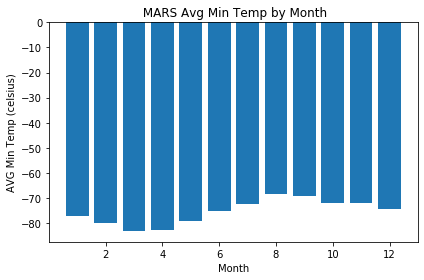

In [84]:
# Plot the average temperature by month
plt.bar(grouped_df['month'],grouped_df['min_temp'])
plt.xlabel('Month')
plt.ylabel('AVG Min Temp (celsius)')
plt.title(' MARS Avg Min Temp by Month')
plt.tight_layout()
plt.show()

In [95]:
# Identify the coldest and hottest months in Curiosity's location
min_temp = grouped_df['min_temp'].min()
min_month = grouped_df.loc[grouped_df['min_temp']==min_temp,'month'].values[0]
max_temp = grouped_df['min_temp'].max()
max_month = grouped_df.loc[grouped_df['min_temp']==max_temp,'month'].values[0]
print(f'The coldest month on average at Curiositys location is month number: {min_month}')
print(f'The hottest month on average at Curiositys location is month number: {max_month}')

The coldest month on average at Curiositys location is month number: 3
The hottest month on average at Curiositys location is month number: 8


In [86]:
# 4. Average pressure by Martian month
pressure_group = grouped[['month','pressure']]
pressure_group

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


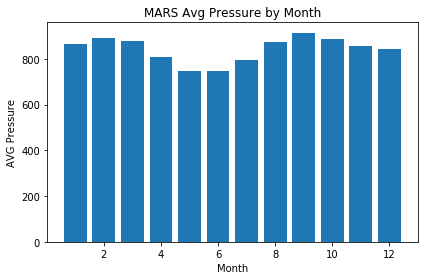

In [88]:
# Plot the average pressure by month
plt.bar(pressure_group['month'],pressure_group['pressure'])
plt.xlabel('Month')
plt.ylabel('AVG Pressure')
plt.title('MARS Avg Pressure by Month')
plt.tight_layout()
plt.show()

In [97]:
# Identify the highest and lowest pressures by month at Curiosity's location
min_pressure = pressure_group['pressure'].min()
min_month = pressure_group.loc[pressure_group['pressure']==min_pressure,'month'].values[0]
max_pressure = pressure_group['pressure'].max()
max_month = pressure_group.loc[pressure_group['pressure']==max_pressure,'month'].values[0]
print(f'Atmospheric pressure is, on average, lowest in the {min_month}th month and highest in the {max_month}th.')

Atmospheric pressure is, on average, lowest in the 6th month and highest in the 9th.


In [108]:
# 5. How many terrestrial (earth) days are there in a Martian year?
## Consider how many days elapse on Earth in the time that Mars circles the Sun once.

# find the starting positing on the sun in the data set
start_ls = df['ls'].loc[0]
# print(start_ls)

# find rows with similar starting positions in the data set.
same_start_ls = df.loc[df['ls']==start_ls]

# create a variable to the first earth date
start_date = same_start_ls['terrestrial_date'].loc[0]
# print(start_date)

# create a variable for the second date with the same position.
end_date = same_start_ls['terrestrial_date'].iloc[1]
# print(end_date)

# create a variable for the difference between the start and end date.
one_year = end_date - start_date 
print(f'A year on Mars appears to be about {one_year}')

A year on Mars appears to be about 686 days 00:00:00


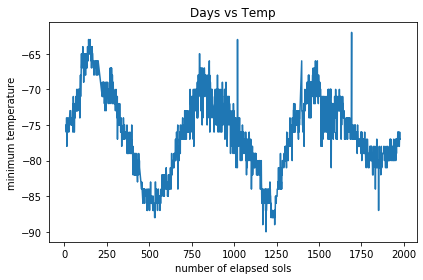

In [16]:
## Visually estimate the result by plotting the daily minimum temperature
plt.plot(df['sol'],df['min_temp'])
plt.xlabel('number of elapsed sols')
plt.ylabel('minimum temperature')
plt.title('Days vs Temp')
plt.tight_layout()
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [17]:
# Write the data to a CSV
df.to_csv('Mars_Temperature_Data.csv',index=False)

In [18]:
browser.quit()